In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

In [111]:
# 设置 DataFrame 只显示 4 行
pd.options.display.max_rows = 4

## Class 1 

### One-Day SPX Returns

In [116]:
# load Data
# SPX 
SPX_DailyReturn = pd.read_csv("./Data/SPX_Daily.csv")
SPX_DailyReturn.rename(columns={'sprtrn':'SPX'}, inplace=True)
SPX_DailyReturn['SPX'] = SPX_DailyReturn['SPX']*100
SPX_DailyReturn['DATE'] = pd.to_datetime(SPX_DailyReturn['DATE'])
SPX_DailyReturn

,DATE,SPX
0,1967-01-03,0.0622
1,1967-01-04,0.2115
...,...,...
13591,2020-12-30,0.1342
13592,2020-12-31,0.6439


In [118]:
# VIX
VIX_DailyReturn = pd.read_csv('./Data/VIX_Daily.csv')
VIX_DailyReturn.rename(columns={'Date':'DATE', 'vix':'VIX'}, inplace=True)
VIX_DailyReturn['DATE'] = pd.to_datetime(VIX_DailyReturn['DATE'])
VIX_DailyReturn.sort_values(by = 'DATE')

,DATE,VIX
0,1986-01-02,NaN
1,1986-01-03,NaN
...,...,...
12862,2022-12-29,21.44
12863,2022-12-30,21.67


In [128]:
# merge data
SPX_DailyData = pd.merge(SPX_DailyReturn, VIX_DailyReturn, on='DATE', how='left')
SPX_DailyData

,DATE,SPX,VIX
0,1967-01-03,0.0622,NaN
1,1967-01-04,0.2115,NaN
...,...,...,...
17121,2020-12-30,0.1342,22.77
17122,2020-12-31,0.6439,22.75


In [130]:
Top10Worst = SPX_DailyData.nsmallest(10, 'SPX').reset_index(drop=True)
Top10Worst

,DATE,SPX,VIX
0,1987-10-19,-20.4669,NaN
1,2020-03-16,-11.9841,82.69
...,...,...,...
8,2020-03-09,-7.5970,54.46
9,1997-10-27,-6.8667,31.12


In [136]:
#Top10Worst.insert(0, 'Rank', range(1,11))
Top10Worst

,Rank,DATE,SPX,VIX
0,1,1987-10-19,-20.4669,NaN
1,2,2020-03-16,-11.9841,82.69
...,...,...,...,...
8,9,2020-03-09,-7.5970,54.46
9,10,1997-10-27,-6.8667,31.12


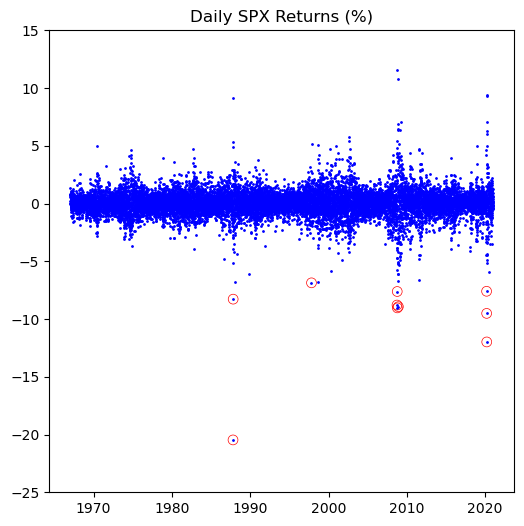

In [50]:
plt.figure(figsize=(6, 6))
plt.plot(SPX_DailyReturn['DATE'], SPX_DailyReturn['sprtrn'], 
         linestyle='None', color='blue', marker='o', markersize=1)
plt.ylim(-25, 15)
plt.scatter(Top10Worst['DATE'], Top10Worst['sprtrn'], facecolors='none', edgecolors='red', 
            marker='o', s=50, linewidths=0.5)
plt.title('Daily SPX Returns (%)')
plt.show()